# Exploring Star Wars Survey
***

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.  This dataset is download from their GitHub repository.

The data has several columns, including:

RespondentID - An anonymized ID for the respondent (person taking the survey)
Gender - The respondent's gender
Age - The respondent's age
Household Income - The respondent's income
Education - The respondent's education level
Location (Census Region) - The respondent's location
Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response.

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning, which involves removing invalid rows, converting yes/no columns to boolean type, renaming columns for better representation, and converting series of columns to float datatypes.

After cleaning up data, I will proceed to explore the dataset to compare total viewership and ranking of different episodes by demograpic factors and fans or not.  

### 1. Import libraries and read the data into a pandas dataframe
***

In [3]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [12]:
row_1_col_15_29 = star_wars.iloc[1:5, 15:30]
row_1_col_15_29

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question


In [39]:
columns_original = star_wars.columns
columns_original

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### 2. Clean up dataset
***

#### Remove any rows where RespondentID is NaN.

In [40]:

star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Convert columns to the Boolean type

In [41]:

yes_no = {
    'Yes': True,
    'No': False
}

In [42]:
star_wars.ix[:,1] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)


In [43]:
star_wars.ix[:, 2] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


In [44]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Converting columns value to boolean 

In [45]:
star_wars.ix[:, 6].unique()

array(['Star Wars: Episode IV  A New Hope', nan], dtype=object)

In [46]:
columns = ['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

to_boolean_list = [
    {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
    },
    {
     'Star Wars: Episode II  Attack of the Clones': True,
    np.NaN: False
    },
    {
     'Star Wars: Episode III  Revenge of the Sith': True,
    np.NaN: False
    },
    {
     'Star Wars: Episode IV  A New Hope': True,
    np.NaN: False
    },
    {
     'Star Wars: Episode V The Empire Strikes Back': True,
    np.NaN: False
    },
    {
     'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
    }
]

for i in range(6):
    star_wars.ix[:, i+3] = star_wars[columns[i]].map(to_boolean_list[i])
    

#### Convert columns to numeric types

In [47]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


#### Rename column names

In [48]:
columns_dict = {
    'Have you seen any of the 6 films in the Star Wars franchise?': 'seen_any_6',
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2', 
    'Unnamed: 5': 'seen_3', 
    'Unnamed: 6': 'seen_4', 
    'Unnamed: 7': 'seen_5', 
    'Unnamed: 8': 'seen_6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6',
    'Are you familiar with the Expanded Universe?': 'expanded_universe_familiarity',
    'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦': 'expanded_universe_fan',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'star_wars_fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'star_trek_fan'
}
star_wars = star_wars.rename(columns=columns_dict)

In [49]:
star_wars.columns

Index(['RespondentID', 'seen_any_6', 'star_wars_fan', 'seen_1', 'seen_2',
       'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2',
       'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'familiarity_expanded_universe', 'fan_expanded_universe',
       'star_trek_fan', 'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

#### Clean up data on characters respondents view favorably and unfavorably

In [56]:
for i in range(15, 30):
    star_wars.ix[:, i].unique()

In [58]:
star_wars.ix[:, 16].unique()

array(['Very favorably', nan, 'Somewhat favorably', 'Somewhat unfavorably',
       'Neither favorably nor unfavorably (neutral)', 'Very unfavorably',
       'Unfamiliar (N/A)'], dtype=object)

### 3. Analysis and Visualization
***

#### Compare movie rankings by respondents and display rankings by movie

In [13]:

movie_rankings = 6 - star_wars[star_wars.columns[9:15]].mean()
movie_rankings

ranking_1    2.267066
ranking_2    1.912679
ranking_3    1.658683
ranking_4    2.727273
ranking_5    3.486842
ranking_6    2.952153
dtype: float64

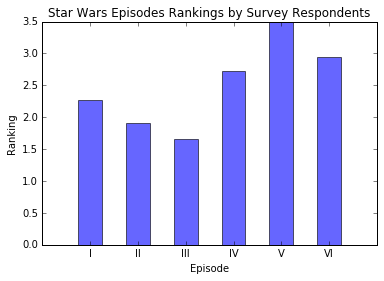

In [14]:
fig, ax = plt.subplots()
bar_positions = arange(6) + 0.75
bar_heights = list(movie_rankings)
tick_labels = ['I', 'II', 'III', 'IV', 'V', 'VI']
tick_position = range(1, 7)
ax.bar(bar_positions, bar_heights, 0.5, alpha=.6)
ax.set_xticklabels(tick_labels)
ax.set_xticks(tick_position)
ax.set_xlabel('Episode')
ax.set_ylabel('Ranking')
ax.set_title('Star Wars Episodes Rankings by Survey Respondents')
plt.show()

In the survey, a lower ranking is better.  Here I subtracted average ranking for each episode from 6 to reverse the meaning as people visually associate higher bars with better quality.  From the above, Episode V is best liked by respondents, next are Episode IV and VI.  The new productions by Lucas were considered so-so. Each new episode was liked less than previous one by respondents.

#### Tally respondent who had seen each episode

In [15]:
count_seen = star_wars[star_wars.columns[3:9]].sum()
count_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

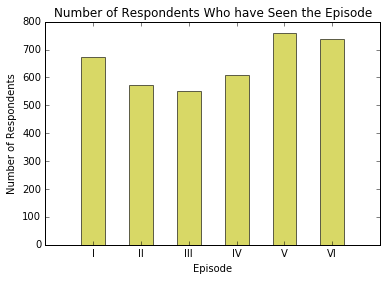

In [16]:
fig, ax = plt.subplots()
bar_positions = arange(6) + 0.75
bar_heights = list(count_seen)
tick_labels = ['I', 'II', 'III', 'IV', 'V', 'VI']
tick_positions = range(1, 7)
ax.bar(bar_positions, bar_heights, 0.5, alpha=.6, color='y')
ax.set_xticklabels(tick_labels)
ax.set_xticks(tick_positions)
ax.set_xlabel('Episode')
ax.set_ylabel('Number of Respondents')
ax.set_title('Number of Respondents Who have Seen the Episode')
plt.show()             
              

As Star War Episode IV came out, it was less known by people.  The good review about Episode V and words of mouth made it the most_viewed Star War episode.  The favorite impression about Episode V enticed people to see Episode VI, which made it the second most-viewed Star War episode.  People had great expectation for Lucas' new production Episode I.  But the movie didn't live up to its hype, so Episode I was the third most-viewed episode.
People were more and more disappointed at Episode II and III, so number of people who went to watch decreased.

Number of people who viewed the episode correlates to episode ranking.

#### Compare the most viewed movie, the highest ranked movie for different groupings

Here the smaller the ranking the better.

##### Split the dataframe by respondents considered himself/herself a fan of the Star Wars film franchise

In [51]:
cols_seen_star_wars_fan = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'star_wars_fan']
seen_by_star_wars_fan = star_wars[cols_seen_star_wars_fan].groupby('star_wars_fan').sum()
seen_by_star_wars_fan

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
star_wars_fan,,,,,,
False,173.0,108.0,100.0,124.0,220.0,201.0
True,500.0,463.0,450.0,483.0,538.0,537.0


The top 3 episodes seen by respondents were Episode V, VI and I no matter they were star wars fans or not.

In [53]:
cols_ranking_star_wars_fan = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'star_wars_fan']
ranking_by_star_wars_fan = star_wars[cols_ranking_star_wars_fan].groupby('star_wars_fan').mean()
ranking_by_star_wars_fan

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
star_wars_fan,,,,,,
False,2.936396,3.591549,4.193662,3.933099,2.862676,3.471831
True,4.141304,4.342391,4.417423,2.932971,2.333333,2.829710


The top 3 episodes ranked by non-star-wars fans were Episode V, I and VI, while for star war fans Episode V, VI, IV.

##### Split the dataframe by respondents considered himself/herself a fan of the Star Trek franchise

In [54]:
cols_seen_star_trek_fan = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'star_trek_fan']
seen_by_star_trek_fan = star_wars[cols_seen_star_trek_fan].groupby('star_trek_fan').sum()
seen_by_star_trek_fan

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
star_trek_fan,,,,,,
No,301.0,228.0,221.0,258.0,353.0,334.0
Yes,364.0,336.0,322.0,342.0,397.0,396.0


The top 3 episodes seen most by respondents were Episode V, VI and I no matter they were star trek fans or not.  

In [55]:
cols_ranking_star_trek_fan = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'star_trek_fan']
ranking_by_star_trek_fan = star_wars[cols_ranking_star_trek_fan].groupby('star_trek_fan').mean()
ranking_by_star_trek_fan

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
star_trek_fan,,,,,,
No,3.487864,3.915254,4.278450,3.433414,2.634383,3.244552
Yes,3.968675,4.255422,4.403382,3.110843,2.407229,2.850602


The top 3 episodes ranked by respondents were Episode V, VI and IV no matter they were star trek fans or not.

##### Split the dataframe by gender

In [50]:
cols_seen_gender = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'Gender']
seen_by_gender = star_wars[cols_seen_gender].groupby('Gender').sum()
seen_by_gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,298.0,237.0,222.0,255.0,353.0,338.0
Male,361.0,323.0,317.0,342.0,392.0,387.0


The top 3 episodes that female respondents have seen are Episode V, VI and I.  The result is the same as male respondents.

In [20]:
cols_ranking_gender = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'Gender']
ranking_by_gender = star_wars[cols_ranking_gender].groupby('Gender').mean()
ranking_by_gender

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


The top 3 episodes ranked by female respondents were Episode V, VI, and I, while the top 3 ranked by male respondents were Episode V, IV, and VI.


##### Segment the dataset by education

##### Segment the dataset by location (Census Region)

##### Split the dataset by respondent's familiarity of expanded universe

##### Split the dataset by respondents considered himself/herself fan of expanded universe